## Demonstração Gradient Descent

**O objetivo desse notebook é trazer uma explicação sobre como funciona o modelo de regressão Linear, aprofundando na matemática da demonstração do modelo de Gradient Descent.**

**Temas a serem abordados:**

- Função de custo (MSE)
- Gradiente descendente
- Atualização dos parâmetros a e b da regressão linear (y = ax + b)
- Learning rate (η)

**Diferenciação:**
- Gradiente descendente em Batch (padrão)
- Gradiente descendente estocástico
- Gradiente descendente em mini-batch

**Além disso, será feita uma demonstração de como o algoritmo funciona na prática para diminuir a função de custo.**


### 1. Função de custo:

O objetivo de uma previsão feita em um modelo de machine learning é a de diminuir o erro. Esse conceito assemelha-se ao da função custo, na qual temos como objetivo acertar o máximo de previsões. Para cada tipo de problemas existem uma função custo associada, por exemplo:

**- Regressão (MSE), erro médio quadrático do inglês Mean squared Error:**

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

Sendo: 

- $Y_i$ representa o valor observado.
- $\hat{Y}_i$ representa o valor previsto.
- $n$ é o número de valores previstos.



**- Classificação (Log-Loss):**

$$LogLoss = -\frac{1}{n} \sum_{i=1}^{n} [y_i \cdot \log(\hat{p}_i) + (1 - y_i) \cdot \log(1 - \hat{p}_i)]$$

Onde:

- $y_i$ representa a verdadeira classe (0 ou 1) para a observação i.
- $\hat{p}_i$ representa a probabilidade prevista de que a observação i pertença à classe 1.
- $n$ é o número de observações.

#### 1.1. Aplicação da fórmula:


Abaixo mostrarei a aplicação da fórmula de forma direta, com valores fictíticios, para assim facilitar a interpretação. Imagine que temos a seguinte tabela, sendo $Y$ o valor real e $\hat{Y}$ o valor previsto.

$$
\begin{array}{|c|c|c|}
\hline
   & \text{Variável Independente (X)} & \text{Variável Dependente (Y)} & \text{Valor Previsto (\(\hat{Y}\))} \\
\hline
1 & 10 & 15 & 14.5 \\
\hline
2 & 20 & 25 & 24.8 \\
\hline
\end{array}
$$

Substituindo na fórmula da MSE obtemos o seguinte valor: 

$$
\begin{align*}
MSE &= \frac{1}{2} [(15 - 14.5)^2 + (25 - 24.8)^2] \\
&= \frac{1}{2} [0.25 + 0.04] \\
&= \frac{1}{2} \cdot 0.29 \\
&= 0.145
\end{align*}
$$

Vale lembrar que existem outras métricas de avaliação de modelos de regressão como:

- Mean Absolute Error (MAE)
- Mean Absolute Percentage Error (MAPE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Percentage Error (MAPE)

cada qual com suas devidas aplicações e interpretações, as quais serão abordadas em outro material.

### 2. Gradiente Descendente:

O gradiente descendente é um método matemático utilizado para minimizar a função custo, isto é, atingir o seu mínimo global.

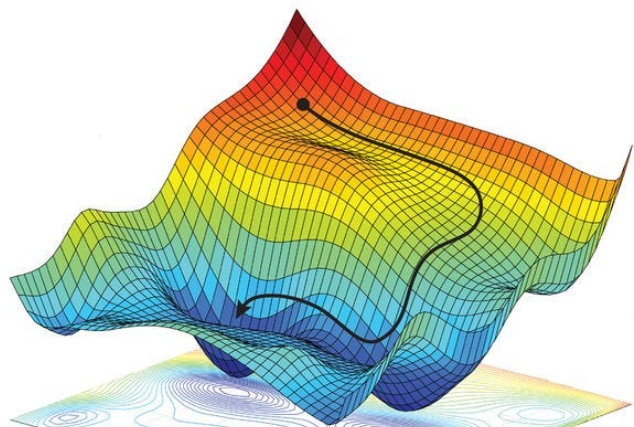



Esse gráfico mostra as mais diversas combinações de parâmetros da função de custo, sendo que algumas combinações geram picos maiores, outras mínimos, locais e globais, ou seja, pontos de derivada = 0 (coeficiente angular 0).

- Mínimo local = Como o próprio nome diz, refere-se ao mínimo de uma determinada região no expaço.
- Mínimo global = Mínimo de todo o espaço (função avaliada).


**Porém vem a pergunta, como o gradiente descendete faz para chegar em seu mínimo global?**

Imagine que você é um montanhista e tenha como objetivo descer o mais rápido possível dessa montanha(função). Para esse objetivo você escolheria o caminho mais ingrime para assim atingir seu objetivo. Dessa forma, a cada passo(learning hate) que você dá observa-se os diversos caminhos disponíveis e escolhe o de maior declive. Em alguns casos pode ocorrer do método considerar um mínimo local como global e encerrar a operação, não minimizando a função custo. **Entretanto**.

- MAE e MSE são funções convexas (mínimo local = mínimo global)
- Funções côncavas são encontradas em modelos de deep learning (mais complexos), nesse caso mínimo global é diferente do local.

**IMPORTANTE**

Para que seu modelo atinga o mínimo globa de forma mais rápido é indicado fazer o escalonamento das features 

## 3. Atualização dos parâmetros a e b:

**1°)Função custo (MSE):**

$ J(a, b) = \frac{1}{2m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2 $

**2°) iniciar os coeficiente a e b como 0:**

a = 0

b = 0

**3°)Atualizar o coeficiente angular (a) e (b):**

Nessa etapa usamos o conceito de derivada parcial, derivando uma variável e mantendo a outra constante na nossa função custo, além disso aplica-se regra da cadeia cortando o 2 exibido no denominador com o 2 obtido no numerador e o x(i) devido a derivada na parte interna da função. 

A atualização desses valores segue uma iteração que a cada passo vai diminuindo o valor desse erro, até atingir o seu mínimo.


$ a = a - \eta \frac{\partial J}{\partial a} = a - \eta \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})x^{(i)} $


$ b = b - \eta \frac{\partial J}{\partial b} = b - \eta \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)}) $

**Observe:** $η$ é chamado de learning hate (taxa de aprendizado), sendo responsável pelo aprendizado do nosso modelo, isto é, voltando a aplicação da descida da montanha aos passos que o montanhista dá. Assim caso o passo seja muito pequeno demora para chegar ao mínimo da função. Entretanto, quando se usa um learning hate muito alto pode divergir, ou passar direto pelo mínimo.

In [50]:
def gradient_descent(valor_inicial, learning_hate, log=False):
    
    #definição do parâmetro inicial e do learning hate
    
    tolerancia = 0.0001 #na programação precisamos colocar um critério de parada para que não fique rodando infinitamente.
    max_iteracoes = 10000 #O máximo de iterações rodadas
    
    # Derivada da função f(x) = x^2

    grad_f = lambda x: 2*x
    
    #Método Gradient Decendent
    
    for i in range(max_iteracoes):
        
        gradiente = -grad_f(valor_inicial)
        valor_inicial = valor_inicial + (gradiente*learning_hate)
        
        
        if log == True:
            
            print(f'X = {valor_inicial}, f(x) = {grad_f(valor_inicial)}')
            
        #criterio de parata
        
        if abs(valor_inicial) <= tolerancia:
            break
            
    print(f'Possível ponto de mínimo global {valor_inicial}')
    print(f'Quantidade de iterações: {i}')

In [51]:
gradient_descent(10, 0.1, log=False)

Possível ponto de mínimo global 9.134385233318146e-05
Quantidade de iterações: 51


## 4. Outros algoritmos

### 4.1. Gradiente descendente em Batch (lote):

No caso abordado anteriormente explicamos o Gradiente descendente aplicado para o caso de apenas um parâmetro (feature). Em casos reais lidamos com datasets com diversas features (variável independente), com o vetor gradiente sendo composto da derivada parcial da função custo em relação a cada um dos parâmetros, o que aumenta e muito a necessidade de maior processamento. Junto disso, ele usa todo o lote de treinamento para cada iteração, isto é, diversas linhas, o que demanda um poder computacional muito grande. Vale ressaltar esse método utiliza a média dos gradientes calculados para atualizar os parâmetros do modelo.



**Funcionamento:**

Imagine que temos n parâmetros (features em nosso dataset: 

$J(\theta_1, \theta_2, \ldots, \theta_n)$

**1°) Inicie os parâmetros com algum valor inicial**

**2°) Defina o learning hate, isto é, a velocidade com que o algoritmo irá convergir**

**3°) Faça iterações:**

- Calcular o vetor gradiente em relação a cada valor de parâmetro e adicione a matriz gradiente de derivadas parciais de cada parâmetro, assim consegue-se medir como a função muda para cada um deles.

$$\nabla J = \left[ \frac{\partial \theta_1}{\partial J}, \frac{\partial \theta_2}{\partial J}, \ldots, \frac{\partial \theta_n}{\partial J} \right]$$

- Após isso atualize o parâmetro subtraindo o gradiente multiplicado pela taxa de aprendizado fornecida. Assim ele encontra a magnitude em que o parâmetro deve ser ajustado.

$$\theta_i = \theta_i - \alpha \frac{\partial \theta_i}{\partial J}$$

- Repita esses iteração até chegar ao mínimo, ou a um critério de parada.



### 4.2. Gradiente Descendente Estocástico:

A grande diferença do algoritmo em relação ao anterior, é a capacidade em lidar com grandes quantidades de dados, isso ocorre pois ao invés de lidar com todos o conjunto de treinamento, ele pega instâncias aleatória do conjunto, sendo o cálculo do gradiente feito a cada linha do dataset. Entretanto, devido a natureza aleatória (estocástica) ele acaba sendo menos regular, ou seja, mesmo que suba, na média caminha em direção ao mínimo, porem nunca se estabiliza completamente.

**Funcionamento:**

**1°) Definição dos parâmetros iniciais**

**2°) Definição do learning hate.**

**3°) Iteração:**

- Calcula-se o gradiente parcial em relação a cada instância (linha do conjunto de treinamento).

- Atualiza os parâmetros das variáveis.

- Repita até atingir o mínimo global ou chegar a um critério de parada.



### 4.3. Gradiente Descendente em Mini-Batch:

Por fim temos o o mini-batch que diferente dos anteriores, lida com amostra de dados aleatórias do nosso conjunto, tendo menor chance de ficar preso a mínimos locais. Esse algoritmo também possui a capacidade de lidar com grandes conjuntos de dados. Sua convergência é mais estável do que o anterior.


**Funcionamento:**

**1°) Definição dos parâmetros iniciais.**

**2°) Definição do Learning Hate.**

**3°) Iteração.**

- Embaralhamento do conjunto de dados e retirada iterativa de amostras.

- Recalcular os parâmetros (gradiente).

- Parar ao chegar no mínimo global ou em uma condição de parada.

### Resumo:

Ambos são úteis para otimizar nossa função, entretanto cada um possui suas peculiaridades, sendo adequado a um certo tipo de análise/necessidade.

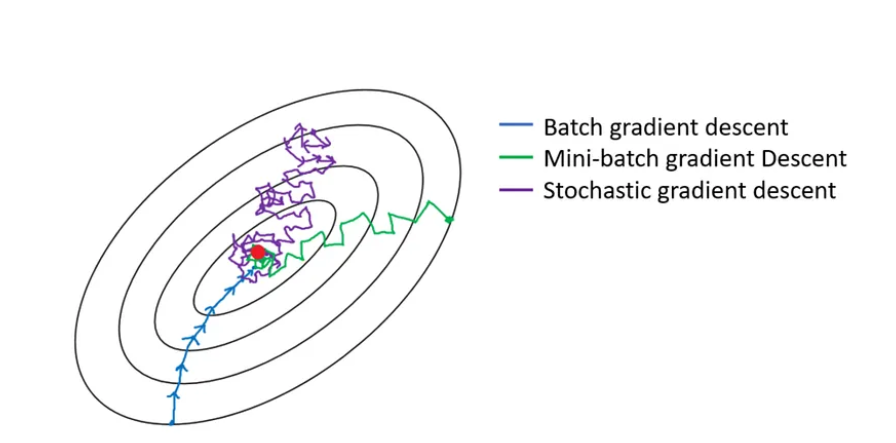
